In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


# Excercise 1 (1 Point)

- Import the csv files
- Clean up the data. Try removing the least amount of usable information. 
- The columns you will work with are: product, sub_product, issue, company, state, submitted_via, timely_response and consumer_disputed. 


In [4]:
bankAccounts = pd.read_csv('./bank_account_or_service_complaints.csv')
columnsToAnalyze = ['product', 'sub_product', 'issue', 'company', 'state', 'submitted_via', 'timely_response','consumer_disputed']
bankAccounts_cleaned = bankAccounts[columnsToAnalyze].dropna()
bankAccounts_cleaned.head()


,product,sub_product,issue,company,state,submitted_via,timely_response,consumer_disputed
0,Bank account or service,Checking account,Using a debit or ATM card,Wells Fargo & Company,CA,Web,True,False
1,Bank account or service,Checking account,"Account opening, closing, or management",Santander Bank US,NY,Fax,True,False
2,Bank account or service,Checking account,Deposits and withdrawals,Wells Fargo & Company,GA,Web,True,False
3,Bank account or service,Checking account,Deposits and withdrawals,Bank of America,TX,Web,True,False
4,Bank account or service,Other bank product/service,Deposits and withdrawals,Wells Fargo & Company,CA,Web,True,False


#  Excercise 2 (2 Points)
- Now you must keep the 5 companies with the most most complains
- and create a new dataframe to further analyze them 


In [ ]:
bankAccounts_cleaned['company'].value_counts().nlargest(5)
top5_companies = bankAccounts_cleaned['company'].value_counts().nlargest(5).index
#top5_companies
bankAccounts_top5 = bankAccounts_cleaned[bankAccounts_cleaned['company'].isin(top5_companies)]
#bankAccounts_top5['company'].value_counts()
bankAccounts_top5.head()

,product,sub_product,issue,company,state,submitted_via,timely_response,consumer_disputed
0,Bank account or service,Checking account,Using a debit or ATM card,Wells Fargo & Company,CA,Web,True,False
2,Bank account or service,Checking account,Deposits and withdrawals,Wells Fargo & Company,GA,Web,True,False
3,Bank account or service,Checking account,Deposits and withdrawals,Bank of America,TX,Web,True,False
4,Bank account or service,Other bank product/service,Deposits and withdrawals,Wells Fargo & Company,CA,Web,True,False
5,Bank account or service,Checking account,Deposits and withdrawals,JPMorgan Chase & Co.,NJ,Postal mail,True,False


#  Excercise 3  (2 Points)

- Plot the number of complaints for top companies and the submission type. 


/var/folders/tk/vymx8h3n4vb47ngqxf6f59l00000gn/T/ipykernel_42987/4266094029.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'Wells Fargo & Company'),
 Text(1, 0, 'Bank of America'),
 Text(2, 0, 'JPMorgan Chase & Co.'),
 Text(3, 0, 'U.S. Bancorp'),
 Text(4, 0, 'Citibank')]

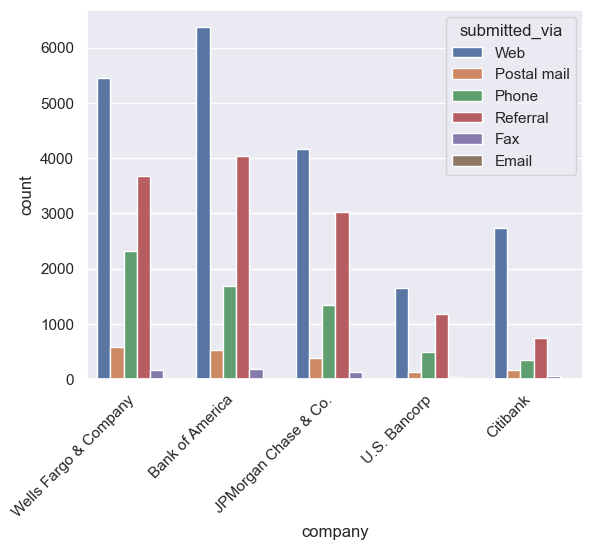

In [12]:
plt.figure()
sns.set_theme(style="darkgrid")
plot = sns.countplot(data=bankAccounts_top5, x='company', hue='submitted_via')

# Rotate x-axis labels for better readability
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Excercise 4 (3 Points)

- Analyze issues that banks are failing to response in time to the clients,
- Identify and assess the top three critical issues that are not being resolved in a timely manner.
- We are expecting a dataframe that contains the company,  issues, the percentage of issues 
- not responded in a timely manner and the percentage of clients disputes.  
- Lastly, make a plot to find out the bank that has the highest percentage of untimely responses. 


In [14]:
bankAccounts_top5.head()

,product,sub_product,issue,company,state,submitted_via,timely_response,consumer_disputed
0,Bank account or service,Checking account,Using a debit or ATM card,Wells Fargo & Company,CA,Web,True,False
2,Bank account or service,Checking account,Deposits and withdrawals,Wells Fargo & Company,GA,Web,True,False
3,Bank account or service,Checking account,Deposits and withdrawals,Bank of America,TX,Web,True,False
4,Bank account or service,Other bank product/service,Deposits and withdrawals,Wells Fargo & Company,CA,Web,True,False
5,Bank account or service,Checking account,Deposits and withdrawals,JPMorgan Chase & Co.,NJ,Postal mail,True,False


In [20]:
top_issues_not_resolved = bankAccounts_top5.groupby(['issue']).agg(
    total_count=pd.NamedAgg(column='timely_response', aggfunc='count'),
    timely_response_percentage=pd.NamedAgg(column='timely_response', aggfunc=lambda x: (x == False).mean() * 100),
    consumer_disputed_percentage=pd.NamedAgg(column='consumer_disputed', aggfunc=lambda x: (x == True).mean() * 100)
).reset_index()
top_issues_not_resolved.head()

,issue,total_count,timely_response_percentage,consumer_disputed_percentage
0,"Account opening, closing, or management",18346,2.948872,20.936444
1,Deposits and withdrawals,11484,2.533960,20.167189
2,"Making/receiving payments, sending money",3530,3.342776,21.841360
3,Problems caused by my funds being low,5248,2.629573,15.967988
4,Using a debit or ATM card,3002,3.031312,19.953364


In [21]:
top_issues_not_resolved = top_issues_not_resolved.sort_values(by=['timely_response_percentage']
                                                              ,ascending=False).reset_index().head(3).issue
top_issues_not_resolved

0    Making/receiving payments, sending money
1                   Using a debit or ATM card
2     Account opening, closing, or management
Name: issue, dtype: object

In [23]:
grouped = bankAccounts_top5.groupby(['company', 'issue']).agg(
    total_count=pd.NamedAgg(column='timely_response', aggfunc='count'),
    timely_response_percentage=pd.NamedAgg(column='timely_response', aggfunc=lambda x: (x == False).mean() * 100),
    consumer_disputed_percentage=pd.NamedAgg(column='consumer_disputed', aggfunc=lambda x: (x == True).mean() * 100)
).reset_index()
grouped.head()

,company,issue,total_count,timely_response_percentage,consumer_disputed_percentage
0,Bank of America,"Account opening, closing, or management",5375,1.060465,18.827907
1,Bank of America,Deposits and withdrawals,3464,1.096998,16.570439
2,Bank of America,"Making/receiving payments, sending money",1123,1.424755,18.878005
3,Bank of America,Problems caused by my funds being low,1831,0.327690,11.469143
4,Bank of America,Using a debit or ATM card,1016,0.590551,18.110236


In [24]:
# Filter the DataFrame to only the top issues
grouped = grouped[grouped['issue'].isin(top_issues_not_resolved)]


/var/folders/tk/vymx8h3n4vb47ngqxf6f59l00000gn/T/ipykernel_42987/3247324195.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'Bank of America'),
 Text(1, 0, 'Citibank'),
 Text(2, 0, 'JPMorgan Chase & Co.'),
 Text(3, 0, 'U.S. Bancorp'),
 Text(4, 0, 'Wells Fargo & Company')]

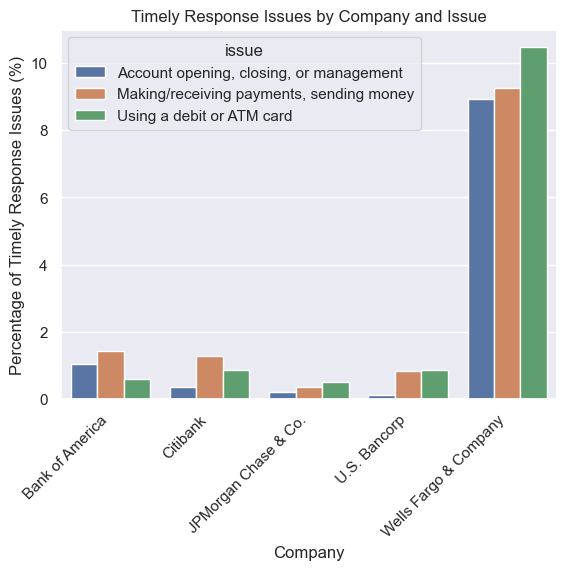

In [26]:
plt.figure()
sns.set_theme(style="darkgrid")
plot = sns.barplot(data=grouped, x='company', y='timely_response_percentage', hue='issue')
# Customize the plot labels and title
plot.set(xlabel = 'Company')
plot.set(ylabel='Percentage of Timely Response Issues (%)')
plot.set(title = 'Timely Response Issues by Company and Issue')

# Rotate x-axis labels for better readability
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


# Excercise 5 (2 Points)

- Using the resulting dataframe from Ej1, build a linear ridge regression model that predicts requests that were satisfied in time (timely_response)
- Use the code below based one OneHotEncoder to build X data matrix.
- OneHotEncoder transforms categorical variables into binary variables
- Use 10% for testing and 5-folds CV in the training.
- Consider that the problem is hihgly unbalanced.
- Assess the problem with auc for precision-recall curve 


In [54]:
y = bankAccounts_cleaned['consumer_disputed']
Xd = bankAccounts_cleaned.drop(columns=['consumer_disputed'])

In [55]:
y = y.astype(int)

In [56]:
from sklearn.preprocessing import OneHotEncoder
categorical_data = Xd
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(categorical_data) # Fit and transform the categorical data
feature_names = encoder.get_feature_names_out(input_features=Xd.columns) # Get the feature names from the encoder
print(feature_names)# 'feature_names' will contain the names of the one-hot encoded columns
X = encoded_data


['product_Bank account or service'
 'sub_product_(CD) Certificate of deposit'
 'sub_product_Cashing a check without an account'
 'sub_product_Checking account' 'sub_product_Other bank product/service'
 'sub_product_Savings account'
 'issue_Account opening, closing, or management'
 'issue_Deposits and withdrawals'
 'issue_Making/receiving payments, sending money'
 'issue_Problems caused by my funds being low'
 'issue_Using a debit or ATM card'
 'company_1st Franklin Financial Corporation'
 'company_ACE Cash Express Inc.' 'company_ACS Education Services'
 'company_AES/PHEAA' 'company_ARM WNY LLC' 'company_ATG Credit, LLC'
 'company_Aargon Agency, Inc.'
 'company_Account Recovery Specialists, Inc.'
 'company_Acquired Assets, Ltd.' 'company_Affiliates Management Company'
 'company_Alegria Auto Sales' 'company_Alliance Data Card Services'
 'company_Alliance Financial Resources, LLC'
 'company_AllianceOne Recievables Management'
 'company_Allied Fidelity Services, LLC' 'company_Allied Inters

In [57]:
categorical_data.shape

(79329, 7)

In [58]:
X.shape

(79329, 496)

In [59]:
categorical_data.head()

,product,sub_product,issue,company,state,submitted_via,timely_response
0,Bank account or service,Checking account,Using a debit or ATM card,Wells Fargo & Company,CA,Web,True
1,Bank account or service,Checking account,"Account opening, closing, or management",Santander Bank US,NY,Fax,True
2,Bank account or service,Checking account,Deposits and withdrawals,Wells Fargo & Company,GA,Web,True
3,Bank account or service,Checking account,Deposits and withdrawals,Bank of America,TX,Web,True
4,Bank account or service,Other bank product/service,Deposits and withdrawals,Wells Fargo & Company,CA,Web,True


In [60]:
categorical_data["sub_product"].unique()

array(['Checking account', 'Other bank product/service',
       '(CD) Certificate of deposit', 'Savings account',
       'Cashing a check without an account'], dtype=object)

In [61]:
pd.DataFrame(X[:5, :5].toarray(), columns=feature_names[:5])

,product_Bank account or service,sub_product_(CD) Certificate of deposit,sub_product_Cashing a check without an account,sub_product_Checking account,sub_product_Other bank product/service
0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)


# Lasso Regression
from sklearn.linear_model import LogisticRegressionCV
m1 = LogisticRegressionCV(Cs=10, cv=5, random_state=0, solver='liblinear',
                          max_iter=100, penalty='l2', class_weight='balanced').fit(X_train, y_train)




In [63]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
ypred = m1.predict(X_train)
precision, recall, thresholds = precision_recall_curve(ypred, y_train)
auc_train = auc(recall, precision)
ypred = m1.predict(X_test)
precision, recall, thresholds = precision_recall_curve(ypred, y_test)
auc_test = auc(recall, precision)

print("AUC_PR in training error : ", auc_train)
print("AUC_PR in test error: ", auc_test)

AUC_PR in training error :  0.5758725310956605
AUC_PR in test error:  0.5688547774721924


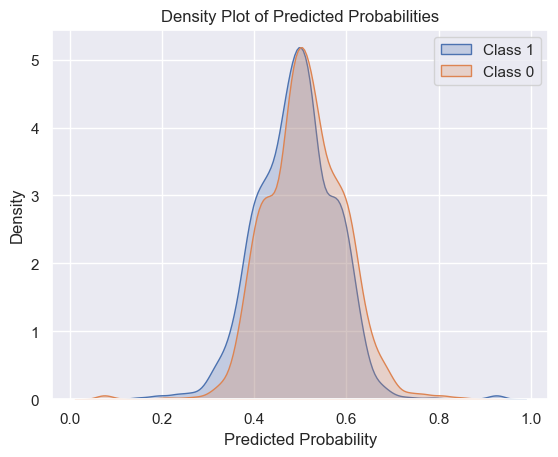

In [65]:
#plot density of the predicted probabilities for both classes
plt.figure()
sns.kdeplot(m1.predict_proba(X_test)[:, 1], label='Class 1', fill=True)
sns.kdeplot(m1.predict_proba(X_test)[:, 0], label='Class 0', fill=True)
plt.title('Density Plot of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.legend()
plt.show()

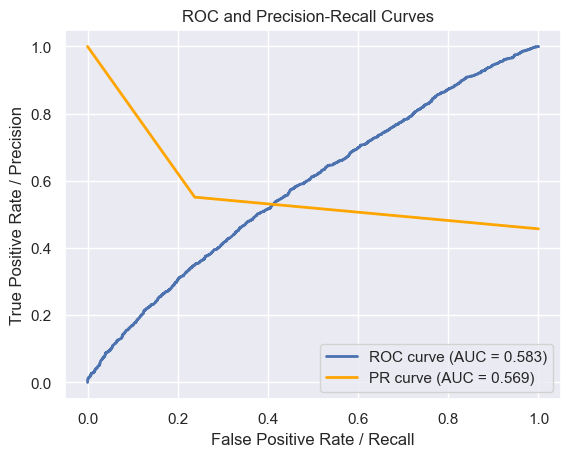

In [74]:
#plot in the same figure the ROC curve and the Precision-Recall curve
from sklearn.metrics import auc
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})', linewidth=2)
plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.3f})', linewidth=2, color='orange')
plt.xlabel('False Positive Rate / Recall')
plt.ylabel('True Positive Rate / Precision')
plt.title('ROC and Precision-Recall Curves  ')
plt.legend()
plt.show()
